`Explanatory Data Analysis for Data-2`

`Summary Statistics`

mean, median, standard deviation and other statistical measures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('../data/raw_data/sierraleone-bumbuna.csv')

print(data.head())

summary_stats = data.describe().transpose()

print(summary_stats)


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
                  count   

``Data Quality Check``

In [2]:

def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5* IQR
  upper_bound = Q3 + 1.5* IQR
  outliers = df[(df[column] < lower_bound) | df[column] > upper_bound]
  return outliers


columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


outliers = {}
for column in columns_to_check:
  outliers[column] = detect_outliers(data, column)
  
  
print("Missing values: \n", data.isnull().sum())
negative_values = data[columns_to_check] < 0
print("Negative Values: \n", negative_values)
for column in columns_to_check:
    print(f"Outliers in {column}: {len(outliers[column])}")

Missing values: 
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Negative Values: 
          GHI    DNI   DHI   ModA   ModB     WS  WSgust
0       True   True  True  False  False  False   False
1       True   True  True  False  False  False   False
2       True   True  True  False  False  False   False
3       True  False  True  False  False  False   False
4       True   True  True  False  False  False   False
...      ...    ...   ...    ...    ...    ...     ...
525595  True   True  True  False  False  False   False
525596  True   True  True  False  False  False   False

`Time Series Analysis`

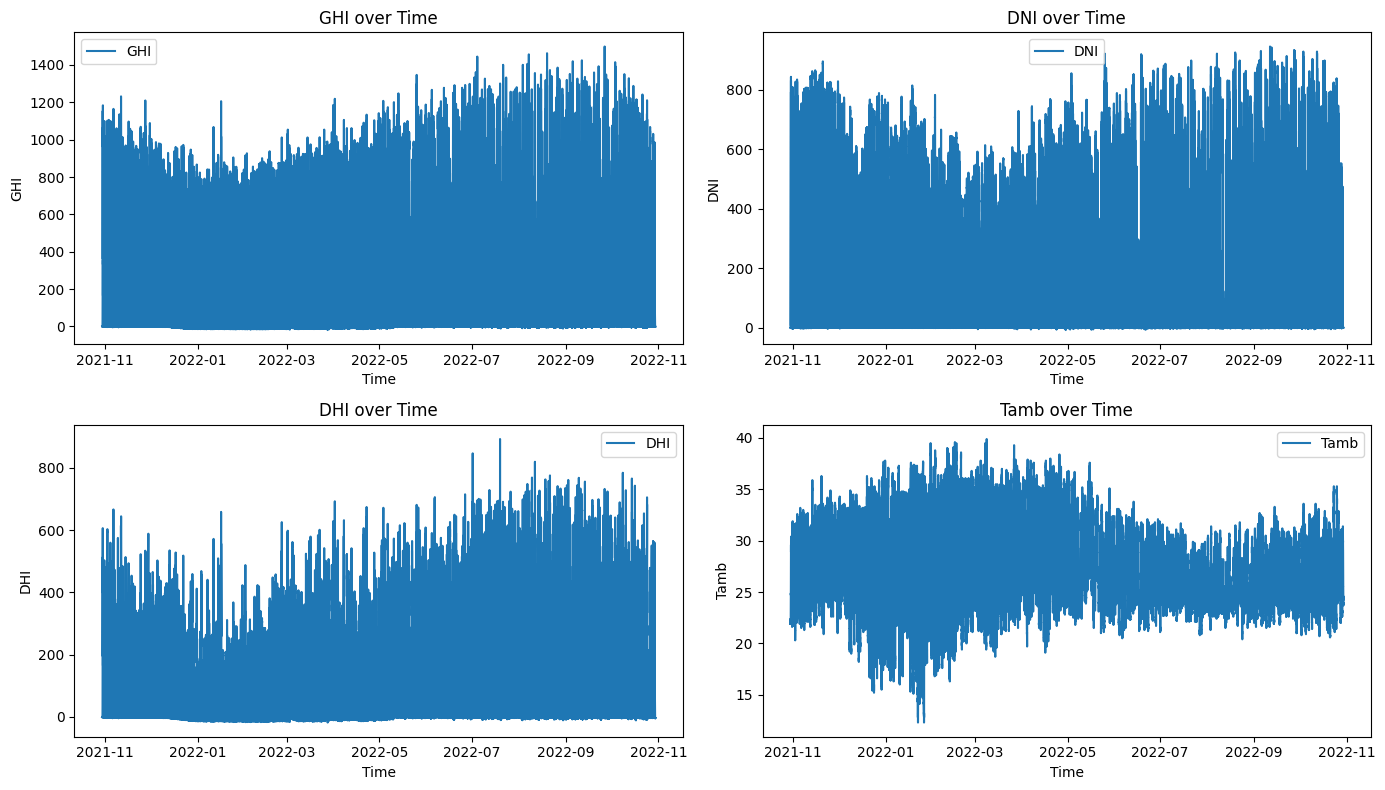

In [3]:

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data.set_index('Timestamp', inplace=True)

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(data.index, data['GHI'], label='GHI')
plt.title('GHI over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(data.index, data['DNI'], label='DNI')
plt.title('DNI over Time')
plt.xlabel('Time')
plt.ylabel('DNI')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(data.index, data['DHI'], label='DHI')
plt.title('DHI over Time')
plt.xlabel('Time')
plt.ylabel('DHI')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(data.index, data['Tamb'], label='Tamb')
plt.title("Tamb over Time")
plt.xlabel('Time')
plt.ylabel('Tamb')
plt.legend()

plt.tight_layout()
plt.show()

`Evalutate the impact of Cleaning on Sensor Readings`

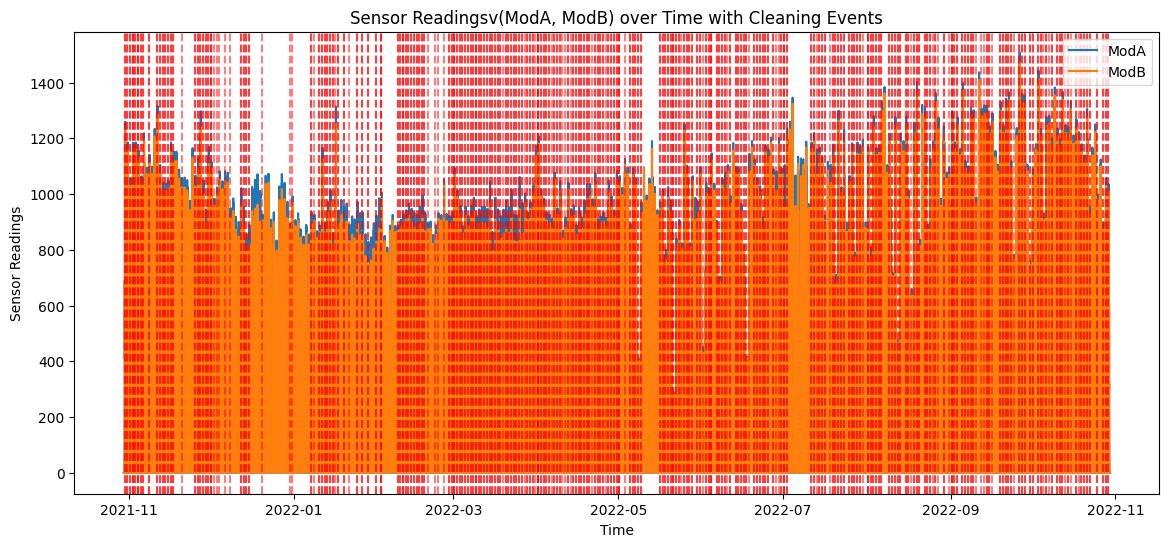

In [4]:
plt.figure(figsize=(14, 6))

plt.plot(data.index, data['ModA'], label='ModA')
plt.plot(data.index, data['ModB'], label='ModB')

cleaning_events = data[data['Cleaning'] == 1].index
for event in cleaning_events:
  plt.axvline(x=event, color='red', linestyle='--', alpha=0.5)
  
plt.title('Sensor Readingsv(ModA, ModB) over Time with Cleaning Events')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend()
plt.show()

`Correlation Analysis`

             GHI       DNI       DHI     TModA     TModB        WS    WSgust  \
GHI     1.000000  0.869108  0.865815  0.923092  0.912260  0.371309  0.411449   
DNI     0.869108  1.000000  0.536710  0.816449  0.808194  0.311493  0.342094   
DHI     0.865815  0.536710  1.000000  0.808479  0.807551  0.347216  0.385978   
TModA   0.923092  0.816449  0.808479  1.000000  0.993228  0.435944  0.474257   
TModB   0.912260  0.808194  0.807551  0.993228  1.000000  0.455200  0.490846   
WS      0.371309  0.311493  0.347216  0.435944  0.455200  1.000000  0.973939   
WSgust  0.411449  0.342094  0.385978  0.474257  0.490846  0.973939  1.000000   
WD      0.404333  0.315941  0.403761  0.459756  0.482911  0.566228  0.627186   

              WD  
GHI     0.404333  
DNI     0.315941  
DHI     0.403761  
TModA   0.459756  
TModB   0.482911  
WS      0.566228  
WSgust  0.627186  
WD      1.000000  


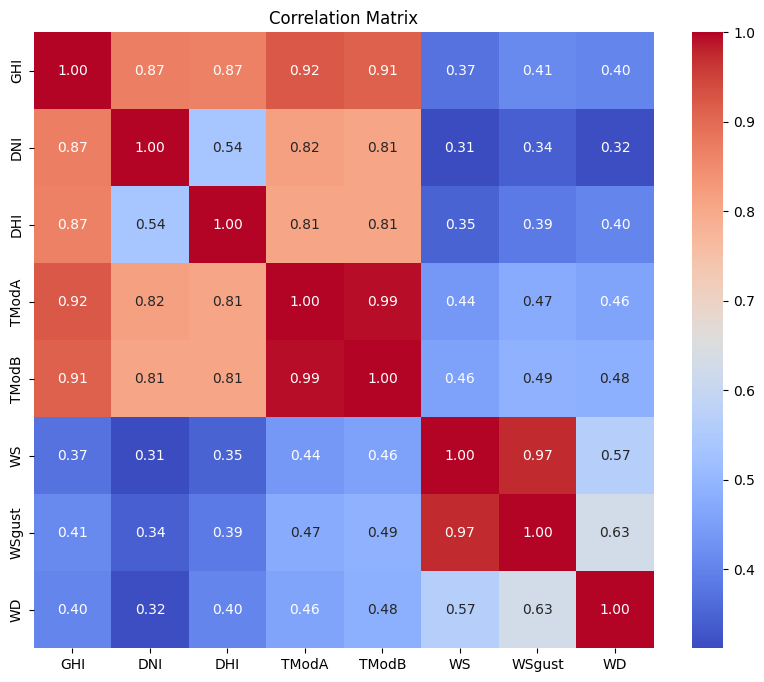

In [5]:

columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
correlation_matrix = data[columns_of_interest].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# sns.pairplot(data[columns_of_interest])
# plt.show()

`Scatter Matrix`

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-0/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


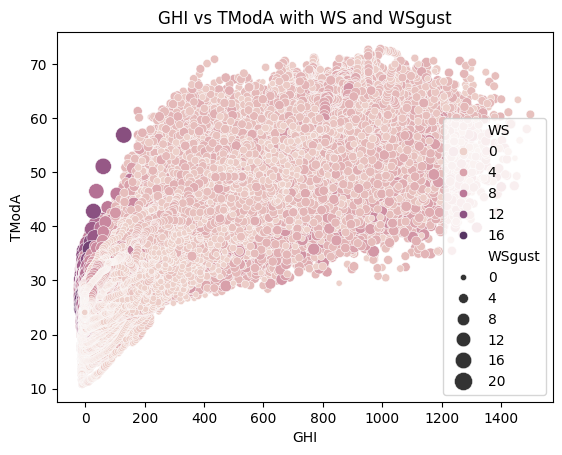

Text(0.5, 1.0, 'WS  vs GHI with Wind Direction (WD)')

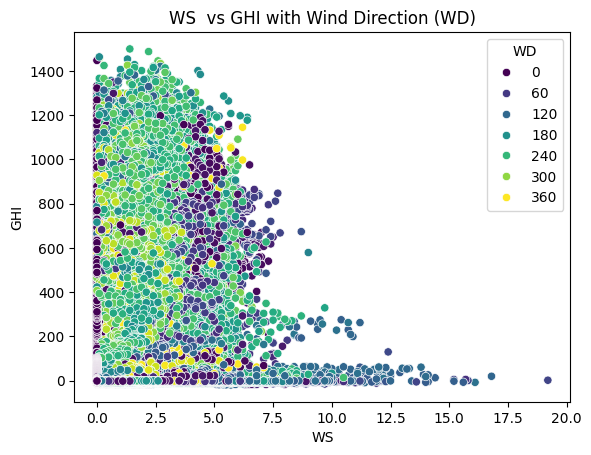

In [6]:
sns.scatterplot(data=data, x='GHI', y="TModA", hue='WS', size='WSgust', sizes=(20, 200))
plt.title('GHI vs TModA with WS and WSgust')
plt.show()

sns.scatterplot(data=data, x='WS', y='GHI', hue='WD', palette='viridis')
plt.title('WS  vs GHI with Wind Direction (WD)')

`Wind Analysis`

Text(0.5, 1.0, 'Wind Rose: Wind Speed and Direction')

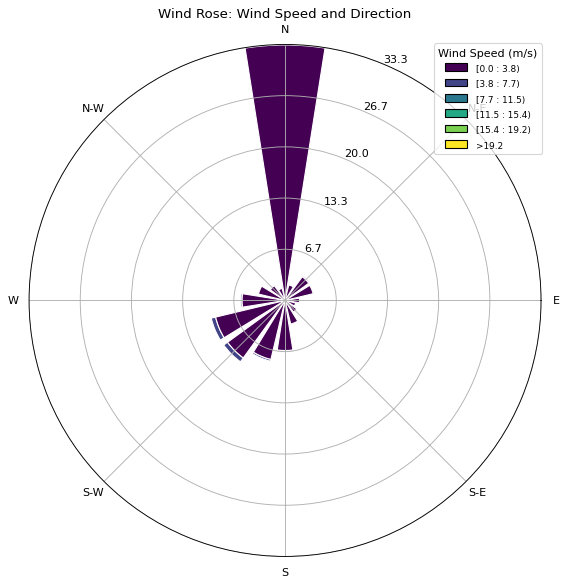

In [7]:
wind_speed = data['WS']
wind_direction = data['WD']

from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title='Wind Speed (m/s)', loc="upper right")
ax.set_title("Wind Rose: Wind Speed and Direction")


`Temperature Analysis`

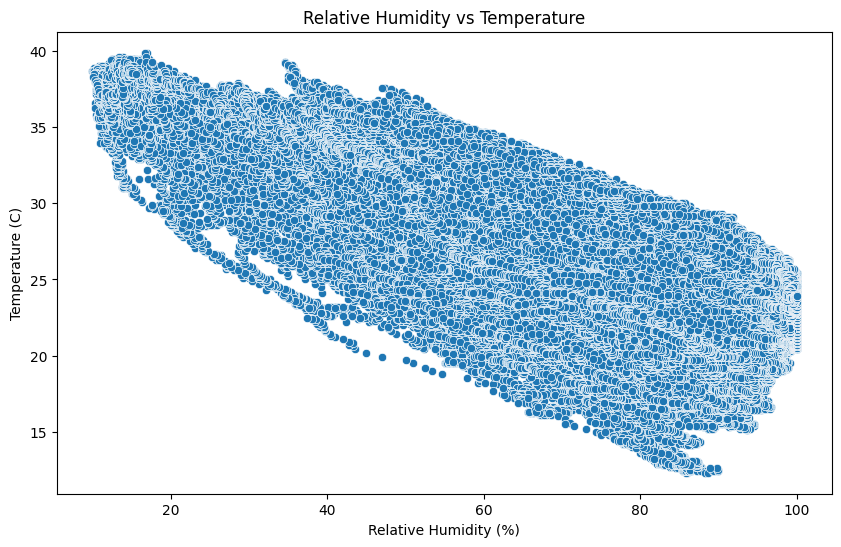

Correlation between RH and Tamb: -0.7919366521547242
Correlation between RH and GHI: -0.5466774606671516
Correlation between RH and DNI: -0.548800199269017
Correlation between RH and DHI: -0.43190952136830646


In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['RH'], y=data['Tamb'])
plt.title('Relative Humidity vs Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (C)')
plt.show()

correlation = data['RH'].corr(data['Tamb'])
print(f"Correlation between RH and Tamb: {correlation}")

correlation_ghi = data['RH'].corr(data['GHI'])
correlation_dni = data['RH'].corr(data['DNI'])
correlation_dhi = data['RH'].corr(data['DHI'])

print(f"Correlation between RH and GHI: {correlation_ghi}")
print(f"Correlation between RH and DNI: {correlation_dni}")
print(f"Correlation between RH and DHI: {correlation_dhi}")

`Histograms`

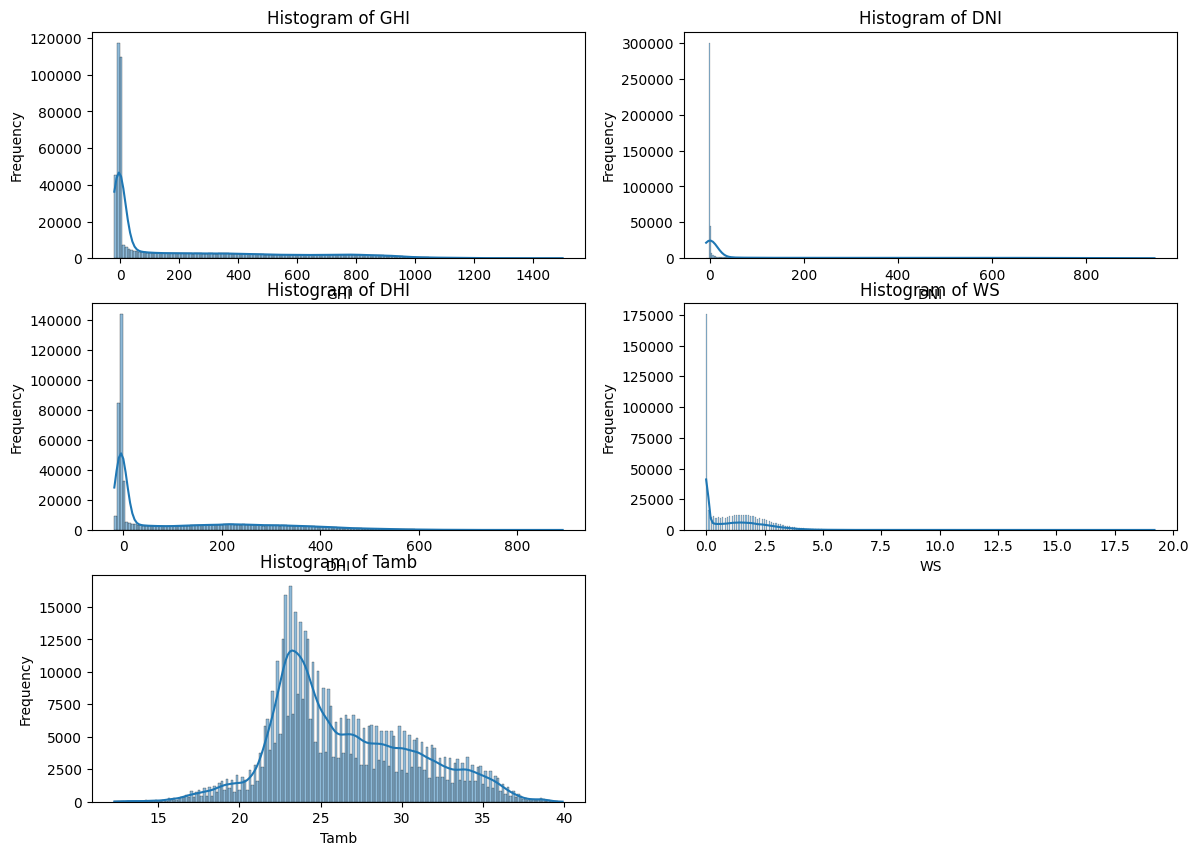

In [9]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

plt.figure(figsize=(14,10))

for i, variable in enumerate(variables, 1):
  plt.subplot(3, 2, i)
  sns.histplot(data[variable], kde=True)
  plt.title(f'Histogram of {variable}')
  plt.xlabel(variable)
  plt.ylabel('Frequency')

`Z-Score Analysis`

Outliers in GHI:
  Timestamp
2021-10-30 11:04:00    1119.0
2021-10-30 11:12:00    1154.0
2021-10-30 13:01:00    1111.0
2021-10-30 13:02:00    1126.0
2021-10-30 13:03:00    1151.0
                        ...  
2022-10-24 13:08:00    1134.0
2022-10-24 13:09:00    1162.0
2022-10-24 13:10:00    1163.0
2022-10-24 13:11:00    1125.0
2022-10-24 14:24:00    1109.0
Name: GHI, Length: 2477, dtype: float64
Outliers in DNI:
  Timestamp
2021-10-30 11:40:00    815.0
2021-10-30 11:41:00    820.0
2021-10-30 11:42:00    830.0
2021-10-30 11:43:00    820.0
2021-10-30 11:44:00    833.0
                       ...  
2022-10-25 13:56:00    808.0
2022-10-25 13:57:00    804.0
2022-10-25 13:58:00    801.0
2022-10-25 13:59:00    795.9
2022-10-25 14:00:00    786.7
Name: DNI, Length: 7586, dtype: float64
Outliers in DHI:
  Timestamp
2021-10-30 10:54:00    594.3
2021-10-30 10:55:00    599.6
2021-10-30 10:56:00    605.9
2021-10-30 10:57:00    603.9
2021-10-30 10:58:00    598.8
                       ...  
2022-10-24

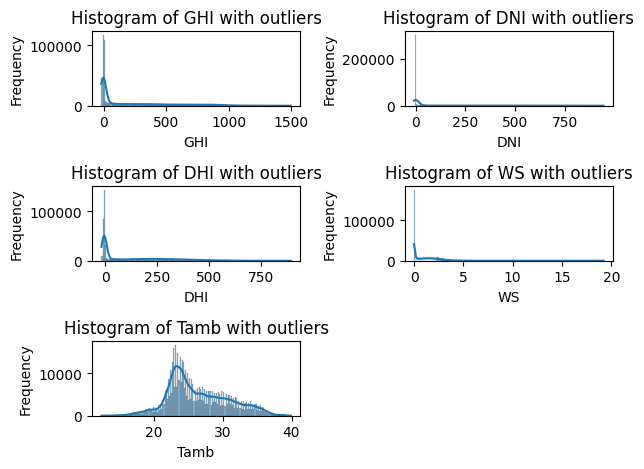

In [10]:
from scipy.stats import zscore
z_scores= data[variables].apply(zscore)

outliers = (z_scores > 3) | (z_scores < -3)

for variable in variables:
  print(f"Outliers in {variable}:\n ", data[variable][outliers[variable]])
  
for i, variable in enumerate(variables, 1):
  plt.subplot(3, 2, i)
  sns.histplot(data[variable], kde=True)
  plt.title(f"Histogram of {variable} with outliers")
  plt.xlabel(variable)
  plt.ylabel('Frequency')
  
plt.tight_layout()
plt.show()


`Bubble Charts`

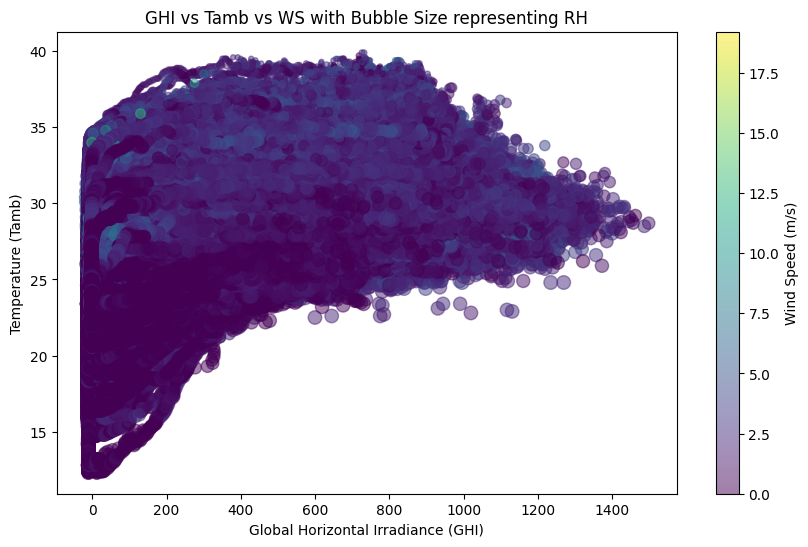

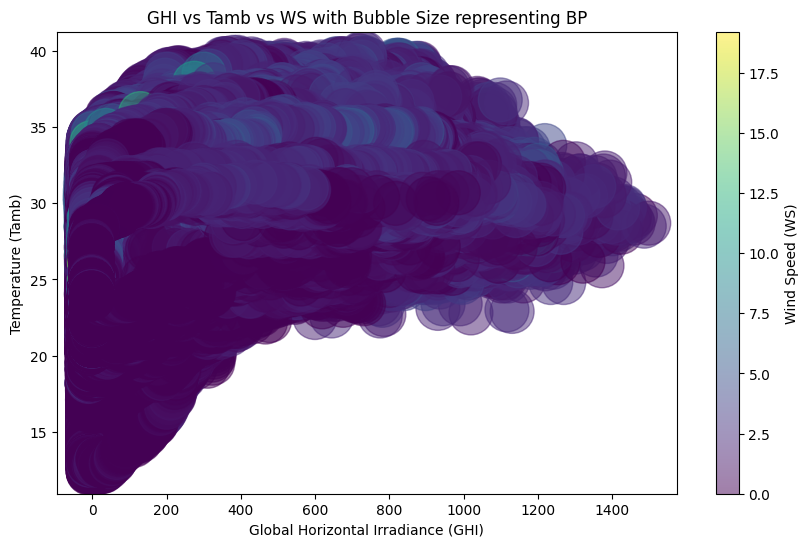

In [11]:
plt.figure(figsize=(10, 6))
bubble_size = data['RH']
plt.scatter(data['GHI'], data['Tamb'], s=bubble_size, alpha=0.5, c=data['WS'], cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.title('GHI vs Tamb vs WS with Bubble Size representing RH')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Temperature (Tamb)')
plt.show()

plt.figure(figsize=(10, 6))
bubble_size = data['BP']
plt.scatter(data['GHI'], data['Tamb'], s=bubble_size, alpha=0.5, c=data['WS'], cmap='viridis')
plt.colorbar(label='Wind Speed (WS)')
plt.title('GHI vs Tamb vs WS with Bubble Size representing BP')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Temperature (Tamb)')
plt.show()

`Data Cleaning`

In [12]:
data.drop(columns=['Comments'], inplace=True)
print("Cleaned DataFrame: \n", data.head())

data.to_csv('../data/cleaned_data/clean_sierraleone-bumbuna.csv', index=False)

Cleaned DataFrame: 
                      GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

                     WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  \
Timestamp                                                                   
2021-10-30 00:01:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:02:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:03:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:04:00      0.0  0.0      0.0  1002         0          